In [100]:
import pandas as pd

In [307]:
# Load the data set (all transactions in 1 year)
# Note: Open CSV file in VS Code and save with 'UTF-8' encoding first
data = pd.read_csv('data/072016_072017.csv')

In [308]:
# View the original data
data.head(10)

,Date,Amount,Account,Balance,Category,Description,Transaction Type,Agent,Unnamed: 8
0,"Jul 6, 2559 BE, 6:31:49 PM",A$0.00,Wallet,A$0.00,NaN,,Opening Balance,NaN,NaN
1,"Jul 6, 2559 BE, 6:32:00 PM",A$61.00,Wallet,(A$61.00),Work: AppSumo,,Expense,NaN,NaN
2,"Jul 7, 2559 BE, 5:41:22 PM",A$12.00,Wallet,(A$73.00),Groceries,Woolworth,Expense,NaN,NaN
3,"Jul 7, 2559 BE, 5:41:49 PM",A$6.00,Wallet,(A$79.00),Home: Other,Clothes hanger,Expense,NaN,NaN
4,"Jul 7, 2559 BE, 5:42:30 PM",A$458.00,Wallet,A$379.00,NaN,,Balance Adjustment,NaN,NaN
5,"Jul 7, 2559 BE, 11:52:46 PM",A$20.00,Wallet,A$359.00,Dining,,Expense,NaN,NaN
6,"Jul 8, 2559 BE, 7:01:39 PM",A$3.30,Wallet,A$355.70,Groceries,,Expense,NaN,NaN
7,"Jul 8, 2559 BE, 7:01:56 PM","A$1,200.00",Wallet,(A$844.30),Home: Rent,550 Bond + 650 July,Expense,NaN,NaN
8,"Jul 9, 2559 BE, 12:07:44 PM",A$20.00,Wallet,(A$864.30),Transportation: Myki,,Expense,NaN,NaN
9,"Jul 9, 2559 BE, 7:18:26 PM",A$12.00,Wallet,(A$876.30),Dining,,Expense,NaN,NaN


In [309]:
# Filter data
expenses = data[data['Transaction Type'] == 'Expense']
expenses = expenses[['Date', 'Amount', 'Category', 'Description']]

In [310]:
len(expenses)

487

In [311]:
# Filtered Data
expenses.head(10)

,Date,Amount,Category,Description
1,"Jul 6, 2559 BE, 6:32:00 PM",A$61.00,Work: AppSumo,
2,"Jul 7, 2559 BE, 5:41:22 PM",A$12.00,Groceries,Woolworth
3,"Jul 7, 2559 BE, 5:41:49 PM",A$6.00,Home: Other,Clothes hanger
5,"Jul 7, 2559 BE, 11:52:46 PM",A$20.00,Dining,
6,"Jul 8, 2559 BE, 7:01:39 PM",A$3.30,Groceries,
7,"Jul 8, 2559 BE, 7:01:56 PM","A$1,200.00",Home: Rent,550 Bond + 650 July
8,"Jul 9, 2559 BE, 12:07:44 PM",A$20.00,Transportation: Myki,
9,"Jul 9, 2559 BE, 7:18:26 PM",A$12.00,Dining,
10,"Jul 9, 2559 BE, 8:56:00 PM",A$5.00,Study Goods,
11,"Jul 11, 2559 BE, 7:01:57 PM",A$5.50,Groceries,Rice and milk


In [312]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 1 to 488
Data columns (total 4 columns):
Date           487 non-null object
Amount         487 non-null object
Category       487 non-null object
Description    487 non-null object
dtypes: object(4)
memory usage: 19.0+ KB


### Combine categories with the same 'CatName:' together

In [313]:
# See unique category
expenses['Category'].value_counts()

Dining                         194
Groceries                      140
Entertainment                   38
Clothing                        24
Study Goods                     22
Transportation: Myki            20
Home: Rent                      12
Utilities: Cell Phone            8
Work: AppSumo                    7
Transportation: Other            6
Work: Domain Hosting             5
Work: Work                       3
Transportation: Air Travel       2
Home: Other                      2
Work: Courses                    2
Utilities: Electricity           1
Utilities: Cable                 1
Name: Category, dtype: int64

In [314]:
# Combine categories with the same 'CatName:' together
for catName in expenses['Category'].unique():
    if('Air Travel' in catName):
        expenses.loc[expenses['Category'] == catName, 'Category'] = 'Air Travel'
    elif(':' in catName):
        head, sep, tail = catName.partition(':')
        expenses.loc[expenses['Category'] == catName, 'Category'] = head

In [315]:
# Check the result
expenses['Category'].value_counts()

Dining            194
Groceries         140
Entertainment      38
Transportation     26
Clothing           24
Study Goods        22
Work               17
Home               14
Utilities          10
Air Travel          2
Name: Category, dtype: int64

### Change 'Date' to datetime type

In [316]:
# Change 'Date' to datetime type
expenses['Date'].head()

1     Jul 6, 2559 BE, 6:32:00 PM
2     Jul 7, 2559 BE, 5:41:22 PM
3     Jul 7, 2559 BE, 5:41:49 PM
5    Jul 7, 2559 BE, 11:52:46 PM
6     Jul 8, 2559 BE, 7:01:39 PM
Name: Date, dtype: object

In [317]:
date_only = expenses['Date'].str.extract('([A-Za-z]+)\s(\d+),\s(\d+)', expand=True)

In [318]:
# Convert date and year to int
date_only[1] = date_only[1].astype(int)
date_only[2] = date_only[2].astype(int)
# Convert BE year to BC year
date_only[2] = date_only[2] - 543

In [319]:
# Create new column
for index, row in expenses.iterrows():
    expenses.loc[index, 'Date_Formatted'] = (date_only[0][index] + ' ' + str(date_only[1][index]) + ' ' + str(date_only[2][index]))
    

In [320]:
expenses['Date_Final'] = pd.to_datetime(expenses['Date_Formatted'], format='%b %d %Y')

In [321]:
# Check result
expenses.head()

,Date,Amount,Category,Description,Date_Formatted,Date_Final
1,"Jul 6, 2559 BE, 6:32:00 PM",A$61.00,Work,,Jul 6 2016,2016-07-06
2,"Jul 7, 2559 BE, 5:41:22 PM",A$12.00,Groceries,Woolworth,Jul 7 2016,2016-07-07
3,"Jul 7, 2559 BE, 5:41:49 PM",A$6.00,Home,Clothes hanger,Jul 7 2016,2016-07-07
5,"Jul 7, 2559 BE, 11:52:46 PM",A$20.00,Dining,,Jul 7 2016,2016-07-07
6,"Jul 8, 2559 BE, 7:01:39 PM",A$3.30,Groceries,,Jul 8 2016,2016-07-08


### Change 'Amount' to number type

In [322]:
# Change 'Amount' to number type
def stripDollars(ori):
    head, sep, tail = ori.partition('$')
    return tail.replace(',', '')

expenses['Amount_Final'] = expenses['Amount'].map(stripDollars).astype(float)

In [323]:
# Check result
expenses.head()

,Date,Amount,Category,Description,Date_Formatted,Date_Final,Amount_Final
1,"Jul 6, 2559 BE, 6:32:00 PM",A$61.00,Work,,Jul 6 2016,2016-07-06,61.0
2,"Jul 7, 2559 BE, 5:41:22 PM",A$12.00,Groceries,Woolworth,Jul 7 2016,2016-07-07,12.0
3,"Jul 7, 2559 BE, 5:41:49 PM",A$6.00,Home,Clothes hanger,Jul 7 2016,2016-07-07,6.0
5,"Jul 7, 2559 BE, 11:52:46 PM",A$20.00,Dining,,Jul 7 2016,2016-07-07,20.0
6,"Jul 8, 2559 BE, 7:01:39 PM",A$3.30,Groceries,,Jul 8 2016,2016-07-08,3.3


## Exploratory

In [324]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [325]:
expenses.columns

Index(['Date', 'Amount', 'Category', 'Description', 'Date_Formatted',
       'Date_Final', 'Amount_Final'],
      dtype='object')

In [326]:
# Change column names
expenses.columns = ['Date_Orignial', 'Amount_Original', 'Category', 'Description', 'Date_Formatted',
       'Date', 'Expense']

In [329]:
# Remove work & Travel with Plane
exp_nowork = expenses[ (expenses['Category'] != 'Work') & (expenses['Category'] != 'Air Travel') ]

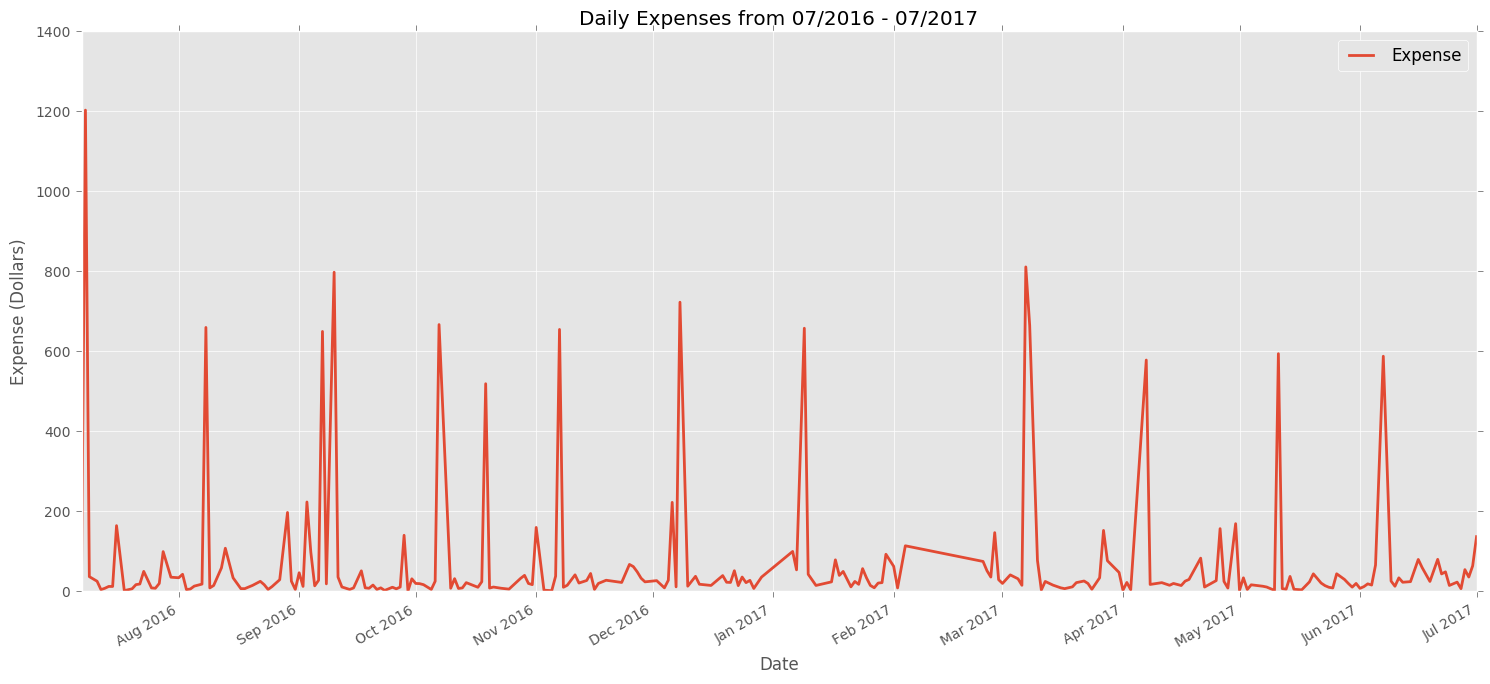

In [406]:
ts = exp_nowork[['Date', 'Expense']]
ts = ts.groupby(by=['Date']).sum()
ax = ts.plot(figsize=(18, 8), title='Daily Expenses from 07/2016 - 07/2017')
ax.set_ylabel("Expense (Dollars)")

In [296]:
import seaborn as sns

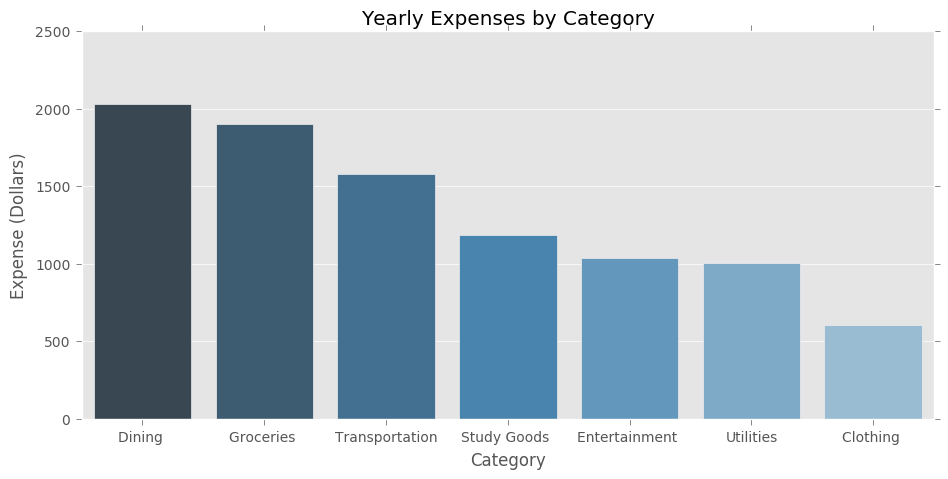

In [425]:
ts = exp_nowork[['Category', 'Expense']].groupby(by='Category').sum()
ts['Category'] = ts.index
ts = ts[ ts['Category'] != 'Home' ]
ts.sort_values('Expense', inplace=True, ascending=False)

# Matplotlib code for plot
# ax = ts.plot(kind='bar', figsize=(18, 8), title='Monthly Expense per Category')
# ax.set_ylabel("Expense (Dollars)")

fig, ax = plt.subplots(figsize=(11, 5))
colors = sns.color_palette("GnBu_d")
g = sns.barplot(ax=ax, data=ts, x='Category', y='Expense', palette="Blues_d")
g.set_title('Yearly Expenses by Category')
g.set_ylabel('Expense (Dollars)')

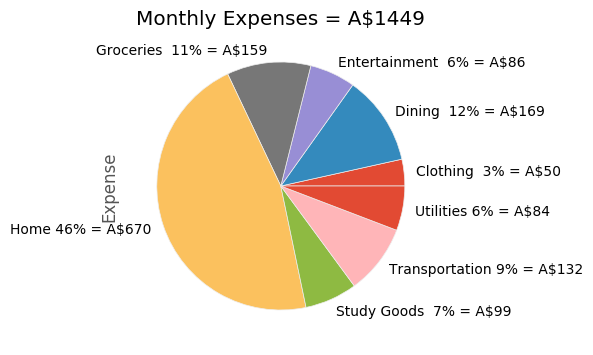

In [402]:
# Average per category per month
ts = exp_nowork[['Category', 'Expense']].groupby(by='Category').sum()
ts['Category'] = ts.index
ts['Expense'] = ts['Expense'] / 12
ts['Expense Fraction'] = ts['Expense'] / sum(ts['Expense'])
ts['Category'] = ts['Category'] + ' ' + (ts['Expense Fraction'].round(2) * 100).astype(int).astype(str) + '%' + ' = A$' + ts['Expense'].round(0).astype(int).astype(str)
ts.index = ts['Category']
ts.sort_values('Expense', ascending=False)
plottitle = 'Monthly Expenses = A$' + str(sum(ts['Expense']).round(0).astype(int))
ts[['Category', 'Expense']].plot(kind='pie', y='Expense', legend=False, figsize=(4, 4), title=plottitle)

In [431]:
# All Expensive Stuffs
print('All Expensive Stuffs bought (more than A$100)')
exp_nowork[(exp_nowork['Expense'] > 100) & (exp_nowork['Category'] != 'Home') & (exp_nowork['Category'] != 'Transportation')][['Date', 'Category', 'Description', 'Expense', ]]

All Expensive Stuffs bought (more than A$100)


,Date,Category,Description,Expense
20,2016-07-16,Clothing,Adidas shoe,120.0
91,2016-09-03,Study Goods,Kindle,174.0
106,2016-09-10,Utilities,Iphone 6s,750.0
156,2016-10-19,Study Goods,Dell display,439.0
222,2016-12-06,Study Goods,Rode mic,168.0
324,2017-03-07,Entertainment,Fitbit,242.0
392,2017-04-30,Study Goods,Samsung t3,159.0
